In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
all_df = pd.concat([train_df, test_df], sort=True).reset_index(drop=True)

In [ ]:
print(all_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None


In [ ]:
df_all_corr = all_df[['Age', 'Survived', 'Fare', 'Pclass', 'SibSp', 'Parch']].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()

df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)

df_all_corr[df_all_corr['Feature 1'] == 'Fare']

,Feature 1,Feature 2,Correlation Coefficient
4,Fare,Fare,1.000000
6,Fare,Pclass,0.558629
14,Fare,Survived,0.257307
18,Fare,Parch,0.221539
20,Fare,Age,0.178740
23,Fare,SibSp,0.160238


In [ ]:
age_by_pclass_sex = all_df.groupby(['Sex', 'Pclass'])['Age'].median()

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {} '.format(pclass, sex, age_by_pclass_sex[sex][pclass].astype(int)))

all_df['Age'] = all_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median())).values

Median age of Pclass 1 females: 36 
Median age of Pclass 1 males: 42 
Median age of Pclass 2 females: 28 
Median age of Pclass 2 males: 29 
Median age of Pclass 3 females: 22 
Median age of Pclass 3 males: 25 


In [ ]:
all_df['Embarked'] = all_df['Embarked'].fillna('S')

In [ ]:
med_fare = all_df.groupby(['Pclass'])['Fare'].median()[3]
all_df['Fare'] = all_df['Fare'].fillna(med_fare)

In [ ]:
all_df['Cabin_Count'] = all_df['Cabin'].apply(lambda s: len(s.split()) if isinstance(s, str) and s.startswith(('A', 'B', 'C', 'D', 'E')) else 1)
print(all_df['Cabin_Count'])

0       1
1       1
2       1
3       1
4       1
       ..
1304    1
1305    1
1306    1
1307    1
1308    1
Name: Cabin_Count, Length: 1309, dtype: int64


In [ ]:
all_df['Deck'] = all_df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
print(all_df['Deck'].value_counts())

Deck
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64


In [ ]:
idx = all_df[all_df['Deck'] == 'T'].index
all_df.loc[idx, 'Deck'] = 'A'

In [ ]:
all_df.drop(['Cabin'], inplace=True, axis=1)

train_df, test_df = all_df.loc[:890], all_df.loc[891:].drop(['Survived'], axis=1)
dfs = [train_df, test_df]

for df in dfs:
    print(df.isnull().sum())
    print('-'*25)

Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
Cabin_Count    0
Deck           0
dtype: int64
-------------------------
Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Ticket         0
Cabin_Count    0
Deck           0
dtype: int64
-------------------------


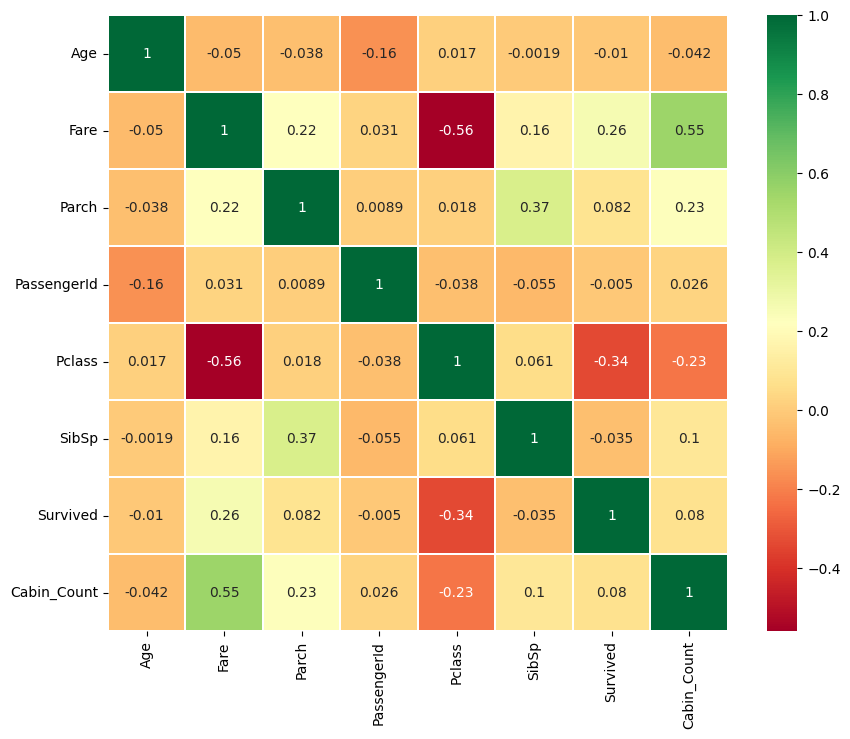

In [ ]:
import seaborn as sns
int_df = all_df.select_dtypes(include=['int', 'float'])
sns.heatmap(int_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

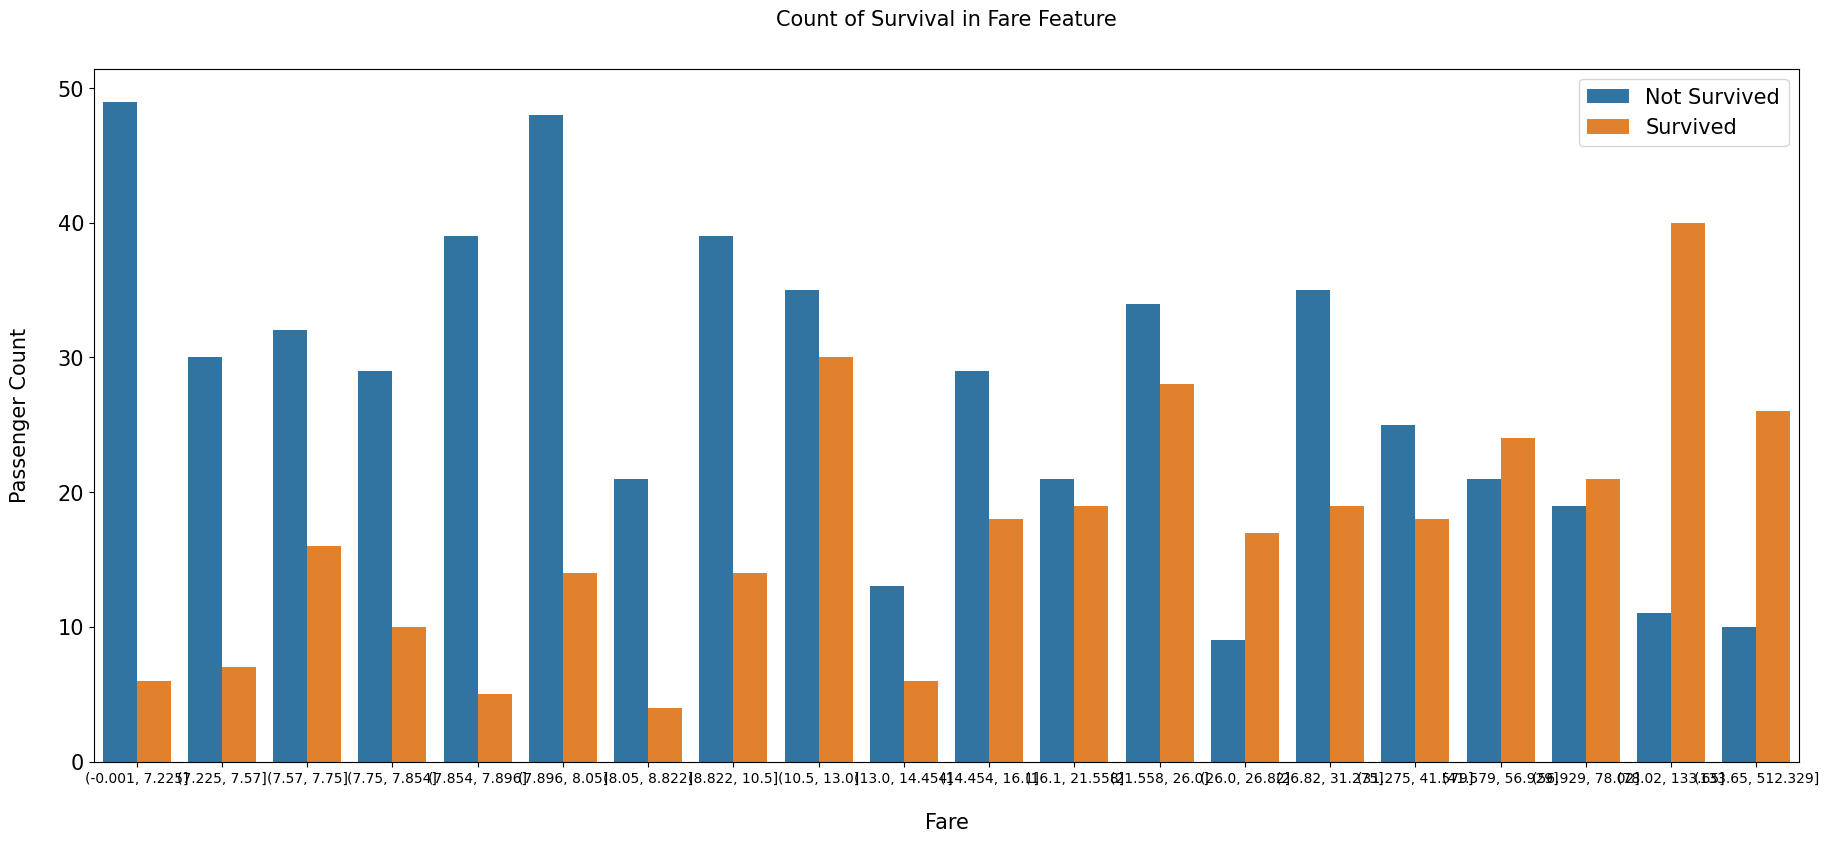

In [ ]:
all_df['Fare'] = pd.qcut(all_df['Fare'], 20)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=all_df)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

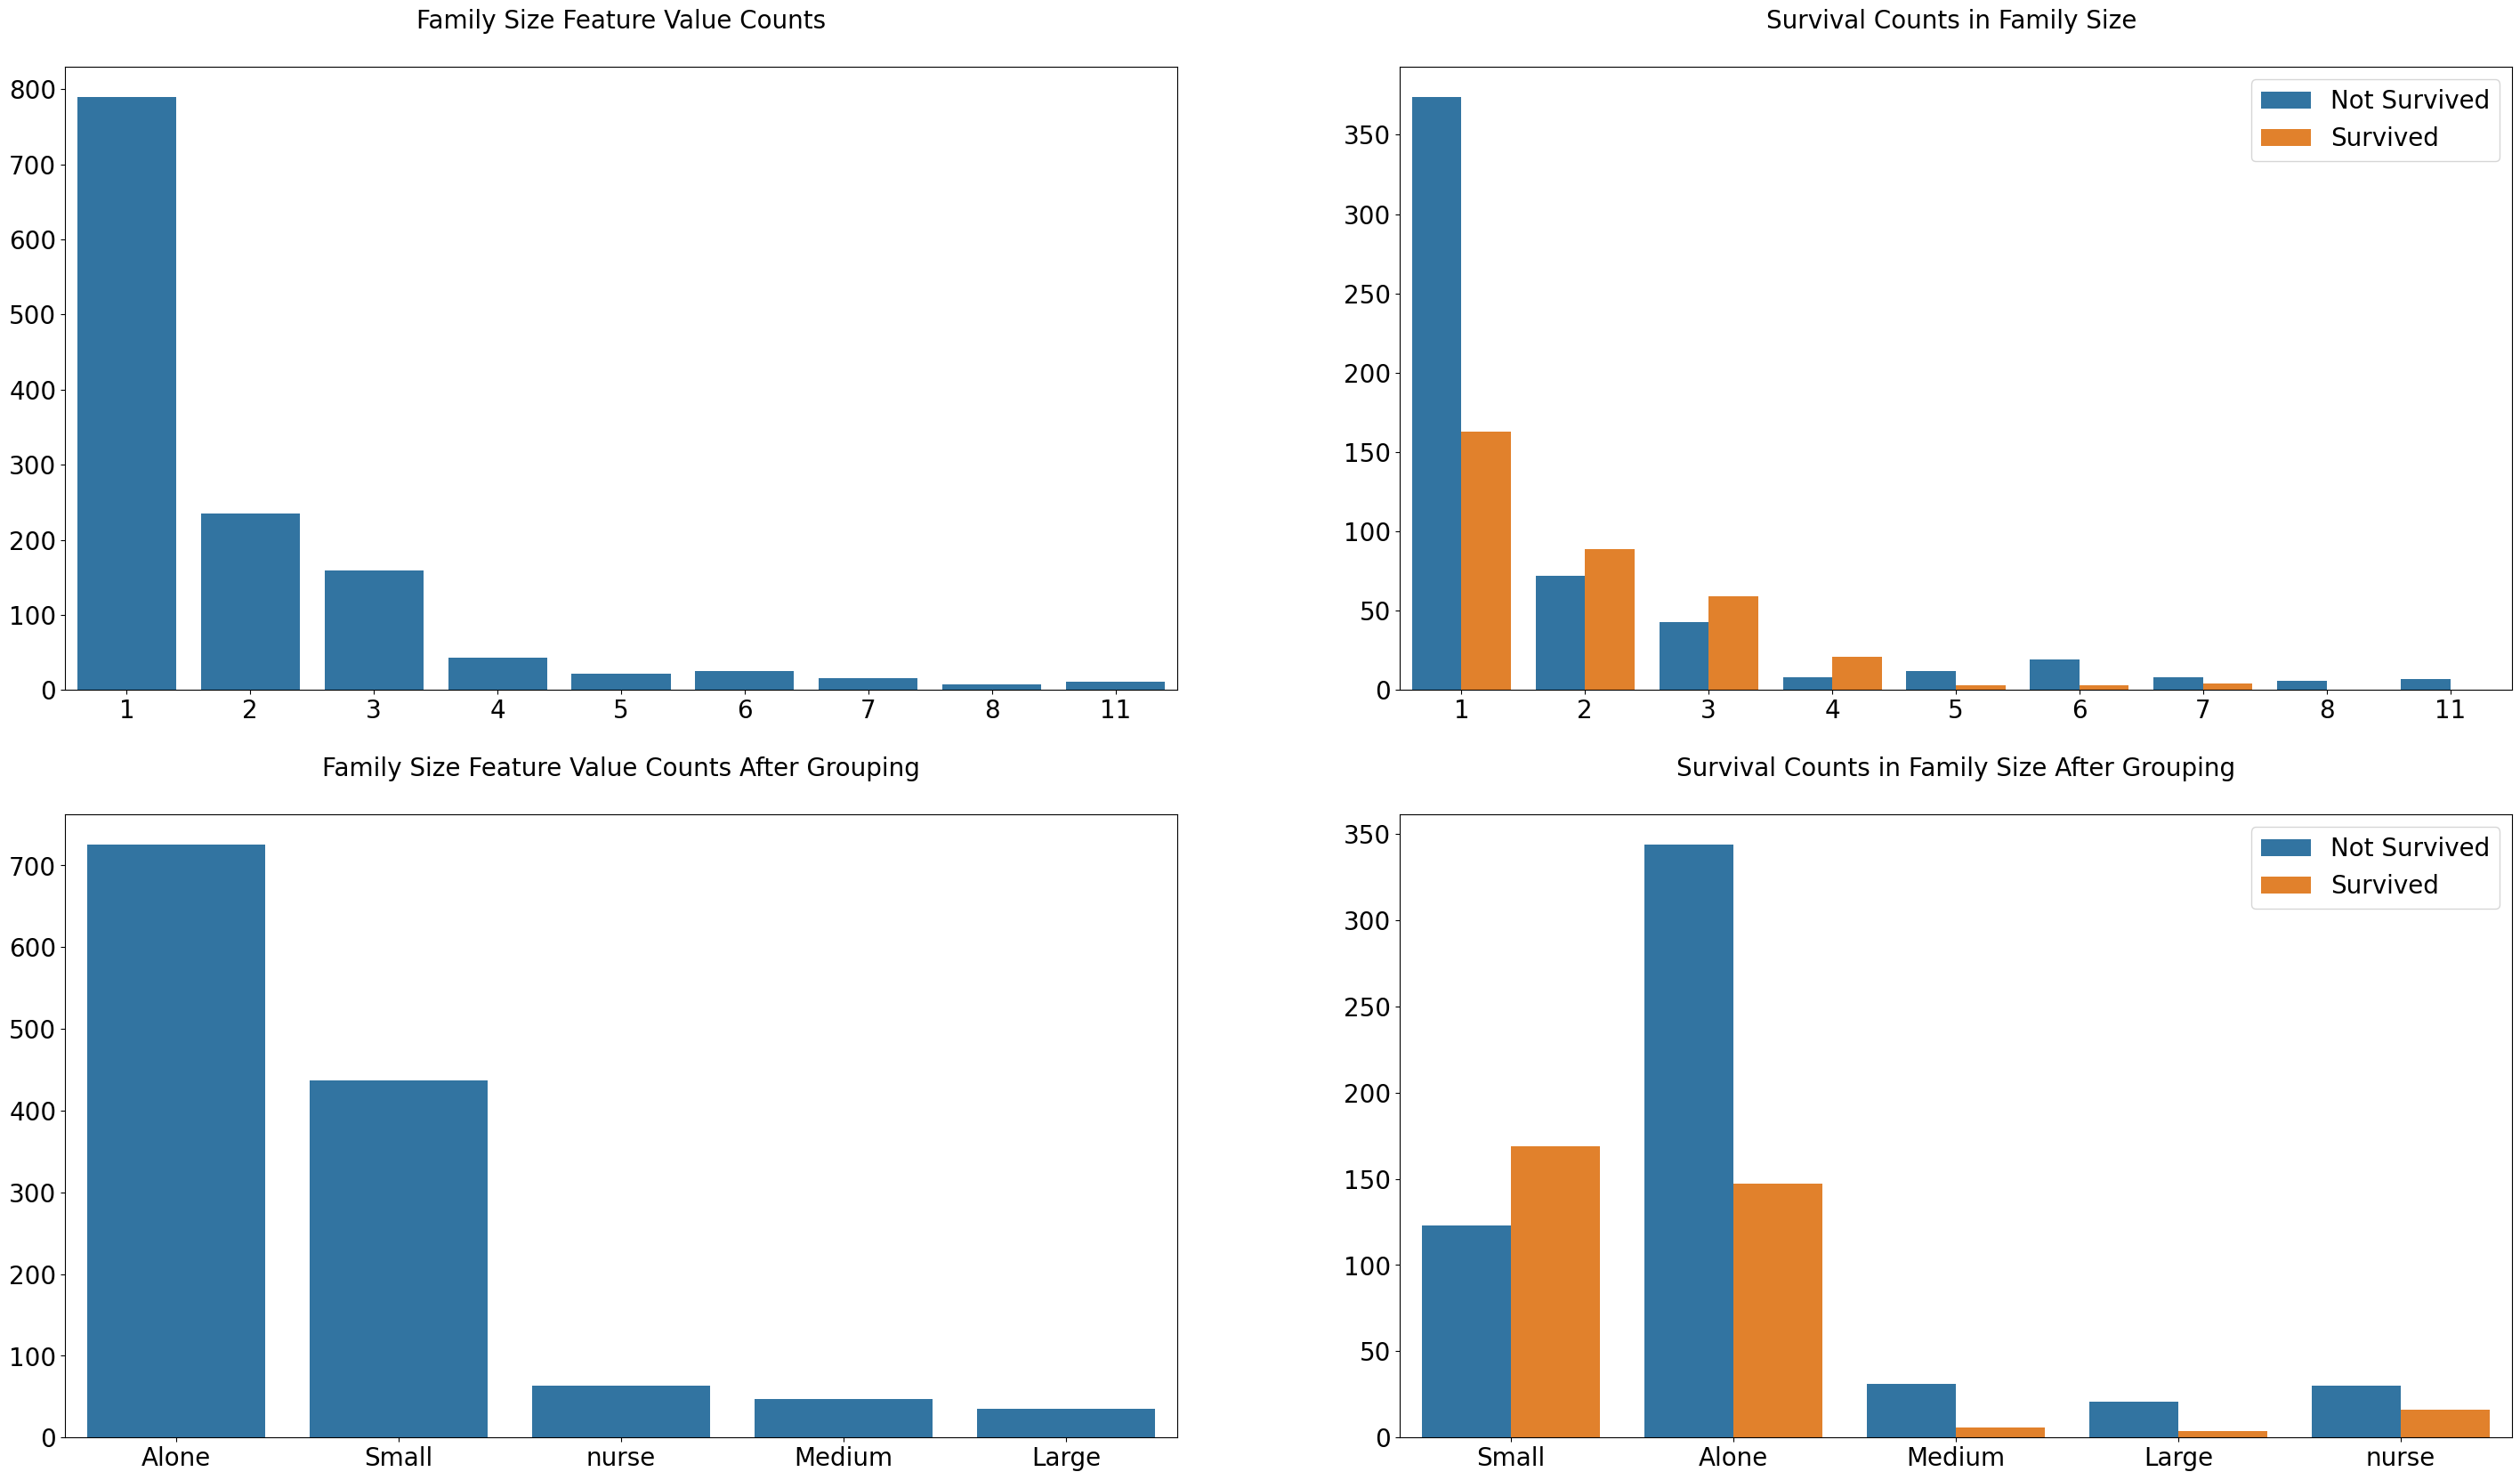

In [ ]:
all_df['Family_Size'] = all_df['SibSp'] + all_df['Parch'] + 1
fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=all_df['Family_Size'].value_counts().index, y=all_df['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=all_df, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

all_df['Family_Size'] = all_df.apply(lambda s: -1 if (s['Age'] <= 14 and s['Family_Size'] == 1) else s['Family_Size'], axis=1)
family_map = {-1: 'nurse', 1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
all_df['Family_Size_Grouped'] = all_df['Family_Size'].map(family_map)
sns.barplot(x=all_df['Family_Size_Grouped'].value_counts().index, y=all_df['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=all_df, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)


for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

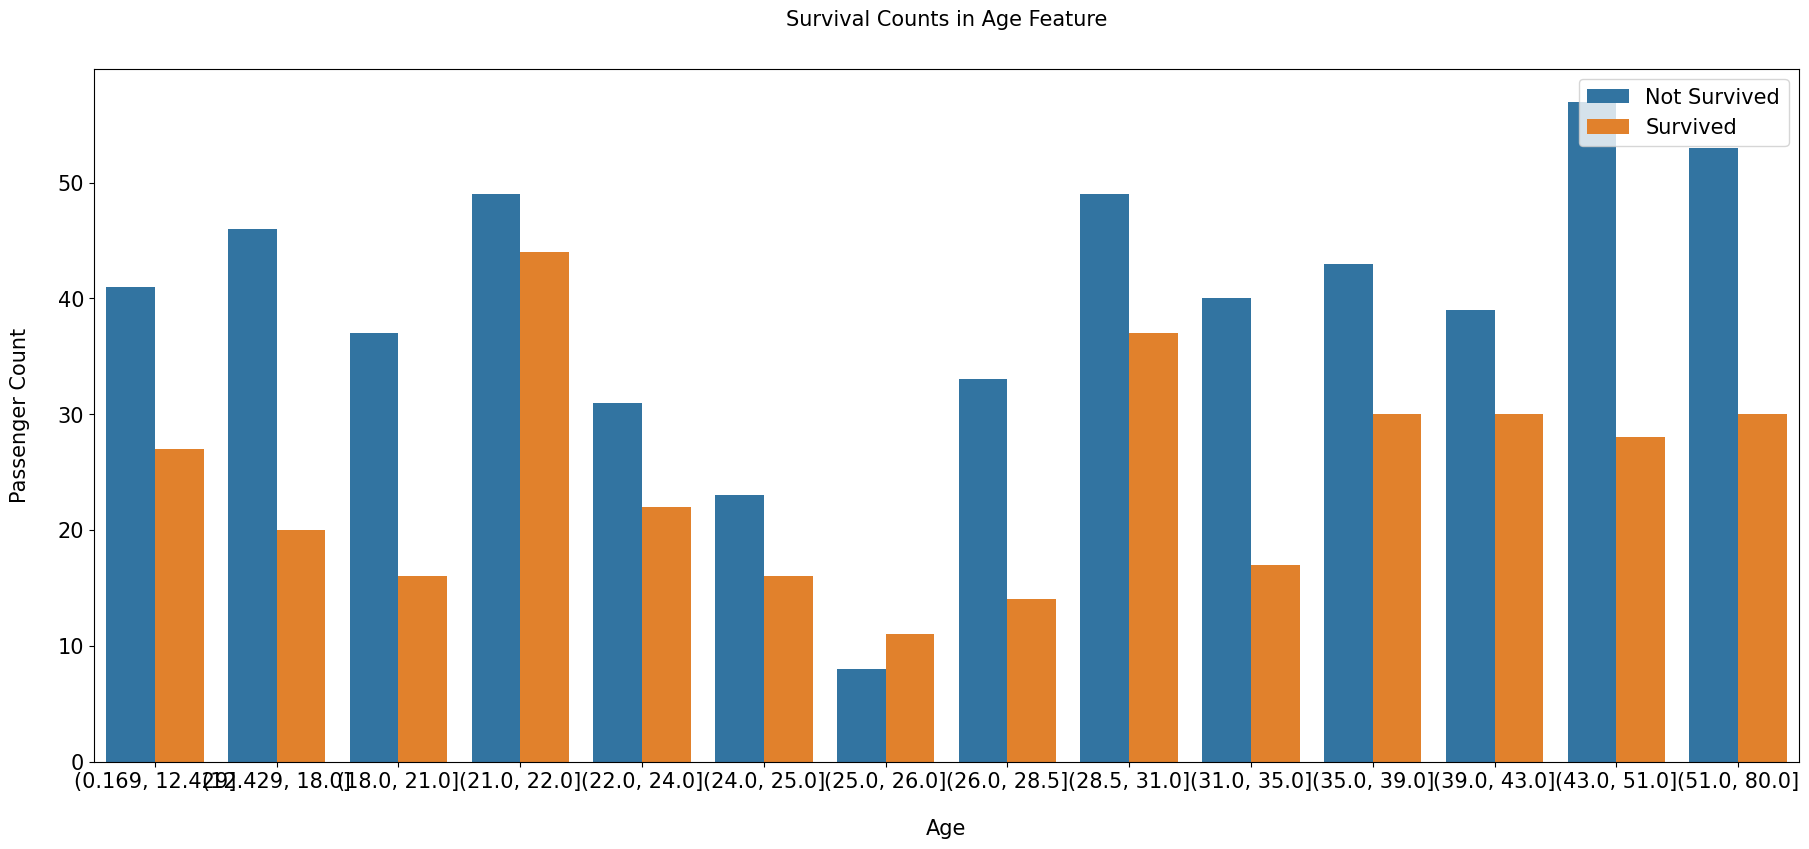

In [ ]:
all_df['Age'] = pd.qcut(all_df['Age'], 14)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=all_df)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

In [ ]:
all_df['Ticket_Frequency'] = all_df.groupby('Ticket')['Ticket'].transform('count')
survival_mean = train_df['Survived'].mean()
all_df['not_null_survived'] = all_df.apply(lambda s: s['Survived'] if pd.notnull(s['Survived']) else survival_mean, axis=1)
all_df['Ticket_Survival_rate'] = all_df.groupby('Ticket')['not_null_survived'].transform('sum') / all_df['Ticket_Frequency']
all_df.drop(columns='not_null_survived', inplace=True)

all_df['Ticket_Survival_rate']

,Ticket_Survival_rate
0,0.000000
1,0.691919
2,1.000000
3,0.500000
4,0.000000
...,...
1304,0.383838
1305,0.461279
1306,0.383838
1307,0.383838


In [ ]:
all_df['Title'] = all_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

all_df['Is_Married'] = 0
all_df['Is_Married'].loc[all_df['Title'] == 'Mrs'] = 1

<ipython-input-19-2dff74f8f17b>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  all_df['Is_Married'].loc[all_df['Title'] == 'Mrs'] = 1
<ipython-input-19-2dff74f8f17b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [ ]:
all_df['Title'] = all_df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
all_df['Title'] = all_df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

In [ ]:
train_df, test_df = all_df.loc[:890], all_df.loc[891:].drop(['Survived'], axis=1)
dfs = [train_df, test_df]

In [ ]:
import string

families = []
for i in range(len(all_df['Name'])):
    name = all_df['Name'].iloc[i]

    if '(' in name:
        name_no_bracket = name.split('(')[0]
    else:
        name_no_bracket = name

    family = name_no_bracket.split(',')[0]

    for c in string.punctuation:
        family = family.replace(c, '').strip()

    families.append(family)

all_df['Family'] = families
train_df = all_df.loc[:890]
test_df = all_df.loc[891:]
dfs = [train_df, test_df]

In [ ]:
all_df['Family_Frequency'] = all_df.groupby('Family')['Family'].transform('count')
all_df['Family_Frequency'] = np.maximum(all_df['Family_Frequency'], all_df['Family_Size'])
survival_mean = train_df['Survived'].mean()
all_df['not_null_survived'] = all_df.apply(lambda s: s['Survived'] if pd.notnull(s['Survived']) else survival_mean, axis=1)
all_df['Family_Survival_rate'] = all_df.groupby('Family')['not_null_survived'].transform('sum') / all_df['Family_Frequency']
all_df.drop(columns=['not_null_survived', 'Family_Size', 'Family'], inplace=True)

all_df['Family_Survival_rate']

,Family_Survival_rate
0,0.000000
1,0.691919
2,1.000000
3,0.500000
4,0.500000
...,...
1304,0.383838
1305,0.383838
1306,0.383838
1307,0.383838


In [ ]:
all_df['Survival_rate'] = (all_df['Family_Survival_rate'] + all_df['Ticket_Survival_rate']) / 2.
all_df.drop(columns=['Family_Survival_rate', 'Ticket_Survival_rate'], inplace=True)
all_df['Survival_rate']

,Survival_rate
0,0.000000
1,0.691919
2,1.000000
3,0.500000
4,0.250000
...,...
1304,0.383838
1305,0.422559
1306,0.383838
1307,0.383838


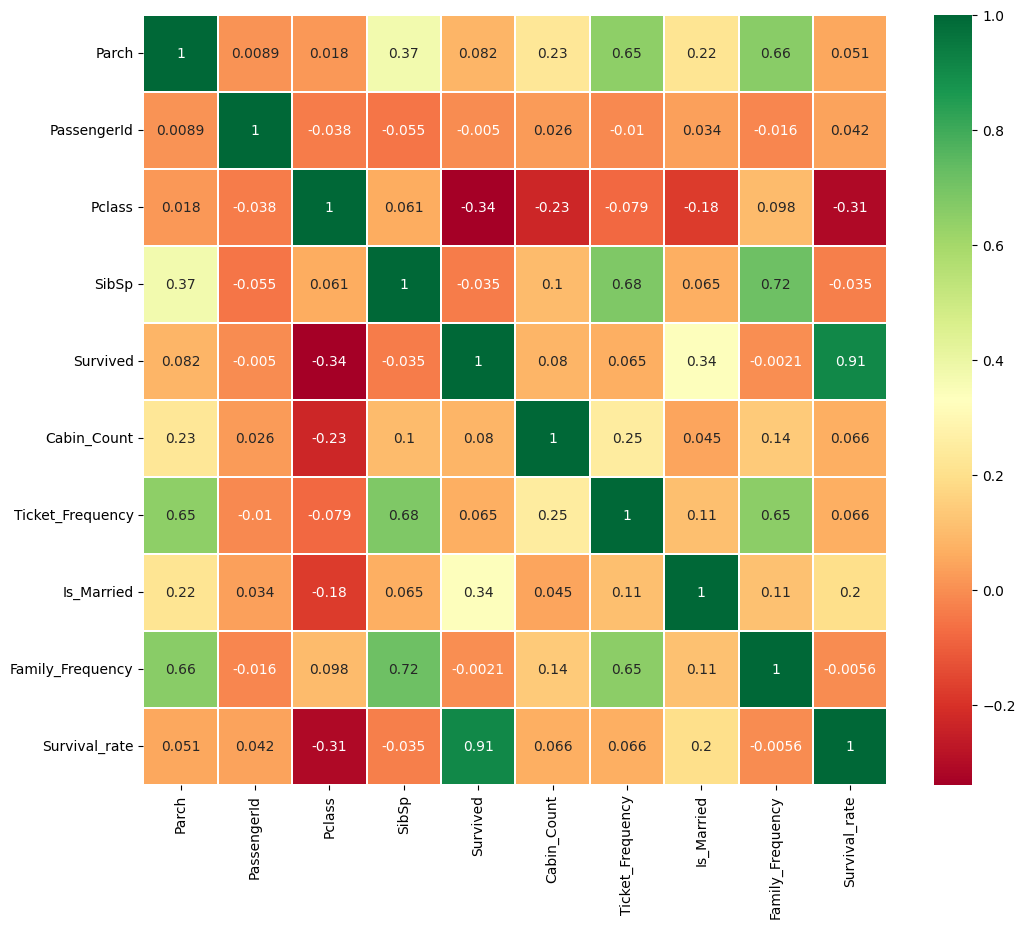

In [ ]:
int_df = all_df.select_dtypes(include=['int', 'float'])
sns.heatmap(int_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()

In [ ]:
train_df, test_df = all_df.loc[:890], all_df.loc[891:].drop(['Survived'], axis=1)
dfs = [train_df, test_df]

for df in dfs:
    print(df.isnull().sum())
    print('-'*25)

Age                    0
Embarked               0
Fare                   0
Name                   0
Parch                  0
PassengerId            0
Pclass                 0
Sex                    0
SibSp                  0
Survived               0
Ticket                 0
Cabin_Count            0
Deck                   0
Family_Size_Grouped    0
Ticket_Frequency       0
Title                  0
Is_Married             0
Family_Frequency       0
Survival_rate          0
dtype: int64
-------------------------
Age                    0
Embarked               0
Fare                   0
Name                   0
Parch                  0
PassengerId            0
Pclass                 0
Sex                    0
SibSp                  0
Ticket                 0
Cabin_Count            0
Deck                   0
Family_Size_Grouped    0
Ticket_Frequency       0
Title                  0
Is_Married             0
Family_Frequency       0
Survival_rate          0
dtype: int64
-----------------------

In [ ]:
from sklearn.preprocessing import LabelEncoder

non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:
        df[feature] = LabelEncoder().fit_transform(df[feature])

<ipython-input-27-3cecbe2011c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = LabelEncoder().fit_transform(df[feature])
<ipython-input-27-3cecbe2011c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = LabelEncoder().fit_transform(df[feature])
<ipython-input-27-3cecbe2011c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in onehot_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

# *encoded_features gives all encoded features of each of Six onehot_features
train_df = pd.concat([train_df, *encoded_features[:6]], axis=1)
test_df = pd.concat([test_df, *encoded_features[6:]], axis=1)

In [ ]:
all_df = pd.concat([train_df, test_df], sort=True).reset_index(drop=True)

# Dropping Un-needed feature
drop_cols = ['Survived', 'Deck', 'Embarked', 'Family_Size_Grouped',
             'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title',]

all_df.drop(columns=drop_cols, inplace=True)

In [ ]:
X = train_df.drop(columns=drop_cols)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X)
y_train = train_df['Survived'].values
X_test = StandardScaler().fit_transform(test_df.drop(columns=drop_cols[1:]))

In [ ]:
# #lr
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()
# classifier.fit(X_train, y_train)
# #nb
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_train, y_train)
# #knn
# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 16, metric = 'minkowski', p = 2)
# classifier.fit(X_train, y_train)
# #svm
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'linear')
# classifier.fit(X_train, y_train)
# #ksvm
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'rbf', tol = 0.01, C = 1.5)
# classifier.fit(X_train, y_train)
#dt
# from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier(criterion = 'entropy')
# classifier.fit(X_train, y_train)
# rf
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=11, n_estimators=101)
classifier.fit(X_train, y_train)

round(classifier.score(X_train, y_train) * 100, 2)

100.0

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score

# print(accuracy_score(y_test, y_pred))
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
# print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': y_pred.astype(int)})
output.to_csv('submission.csv', index=False)